## Introduction
To enhance my understanding of the Keras API and TensorFlow framework, I've selected a dataset that I have previously cleaned and prepared specifically for machine learning projects.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Tomas4python/green_taxi_20/master/cleaned_project_data_20.csv')
data

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,fare_amount,total_amount,trip_duration,night,peak_hour,congestion,amount_without_tip
0,2020-01-01 00:45:58,2020-01-01 00:56:39,66,65,1.28,20.0,24.36,641.0,1,0,0,20.30
1,2020-01-01 00:41:38,2020-01-01 00:52:49,181,228,2.47,10.5,15.34,671.0,1,0,0,11.80
2,2020-01-01 00:52:46,2020-01-01 01:14:21,129,263,6.30,21.0,25.05,1295.0,1,0,1,25.05
3,2020-01-01 00:19:57,2020-01-01 00:30:56,210,150,2.30,10.0,11.30,659.0,1,0,0,11.30
4,2020-01-01 00:52:33,2020-01-01 01:09:54,35,39,3.00,13.5,14.80,1041.0,1,0,0,14.80
...,...,...,...,...,...,...,...,...,...,...,...,...
1128350,2020-12-31 23:08:35,2020-12-31 23:13:00,41,74,0.79,5.0,6.30,265.0,1,0,0,6.30
1128351,2020-12-31 23:11:04,2020-12-31 23:20:08,41,116,2.31,12.0,12.30,544.0,1,0,0,12.30
1128352,2020-12-31 23:24:33,2020-12-31 23:40:24,116,119,5.73,20.0,20.30,951.0,1,0,0,20.30
1128353,2020-12-31 23:13:59,2020-12-31 23:16:20,42,42,0.31,3.5,4.80,141.0,1,0,0,4.80


## Data Preprocessing

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
data.columns.to_list()

['lpep_pickup_datetime',
 'lpep_dropoff_datetime',
 'PULocationID',
 'DOLocationID',
 'trip_distance',
 'fare_amount',
 'total_amount',
 'trip_duration',
 'night',
 'peak_hour',
 'congestion',
 'amount_without_tip']

In [5]:
X = data[[
            'PULocationID',
            'DOLocationID',
            'trip_distance',
            'trip_duration',
            'night',
            'peak_hour',
            'congestion',
]].values
y = data['amount_without_tip'].values
print(X.shape)
print(y.shape)

(1128355, 7)
(1128355,)


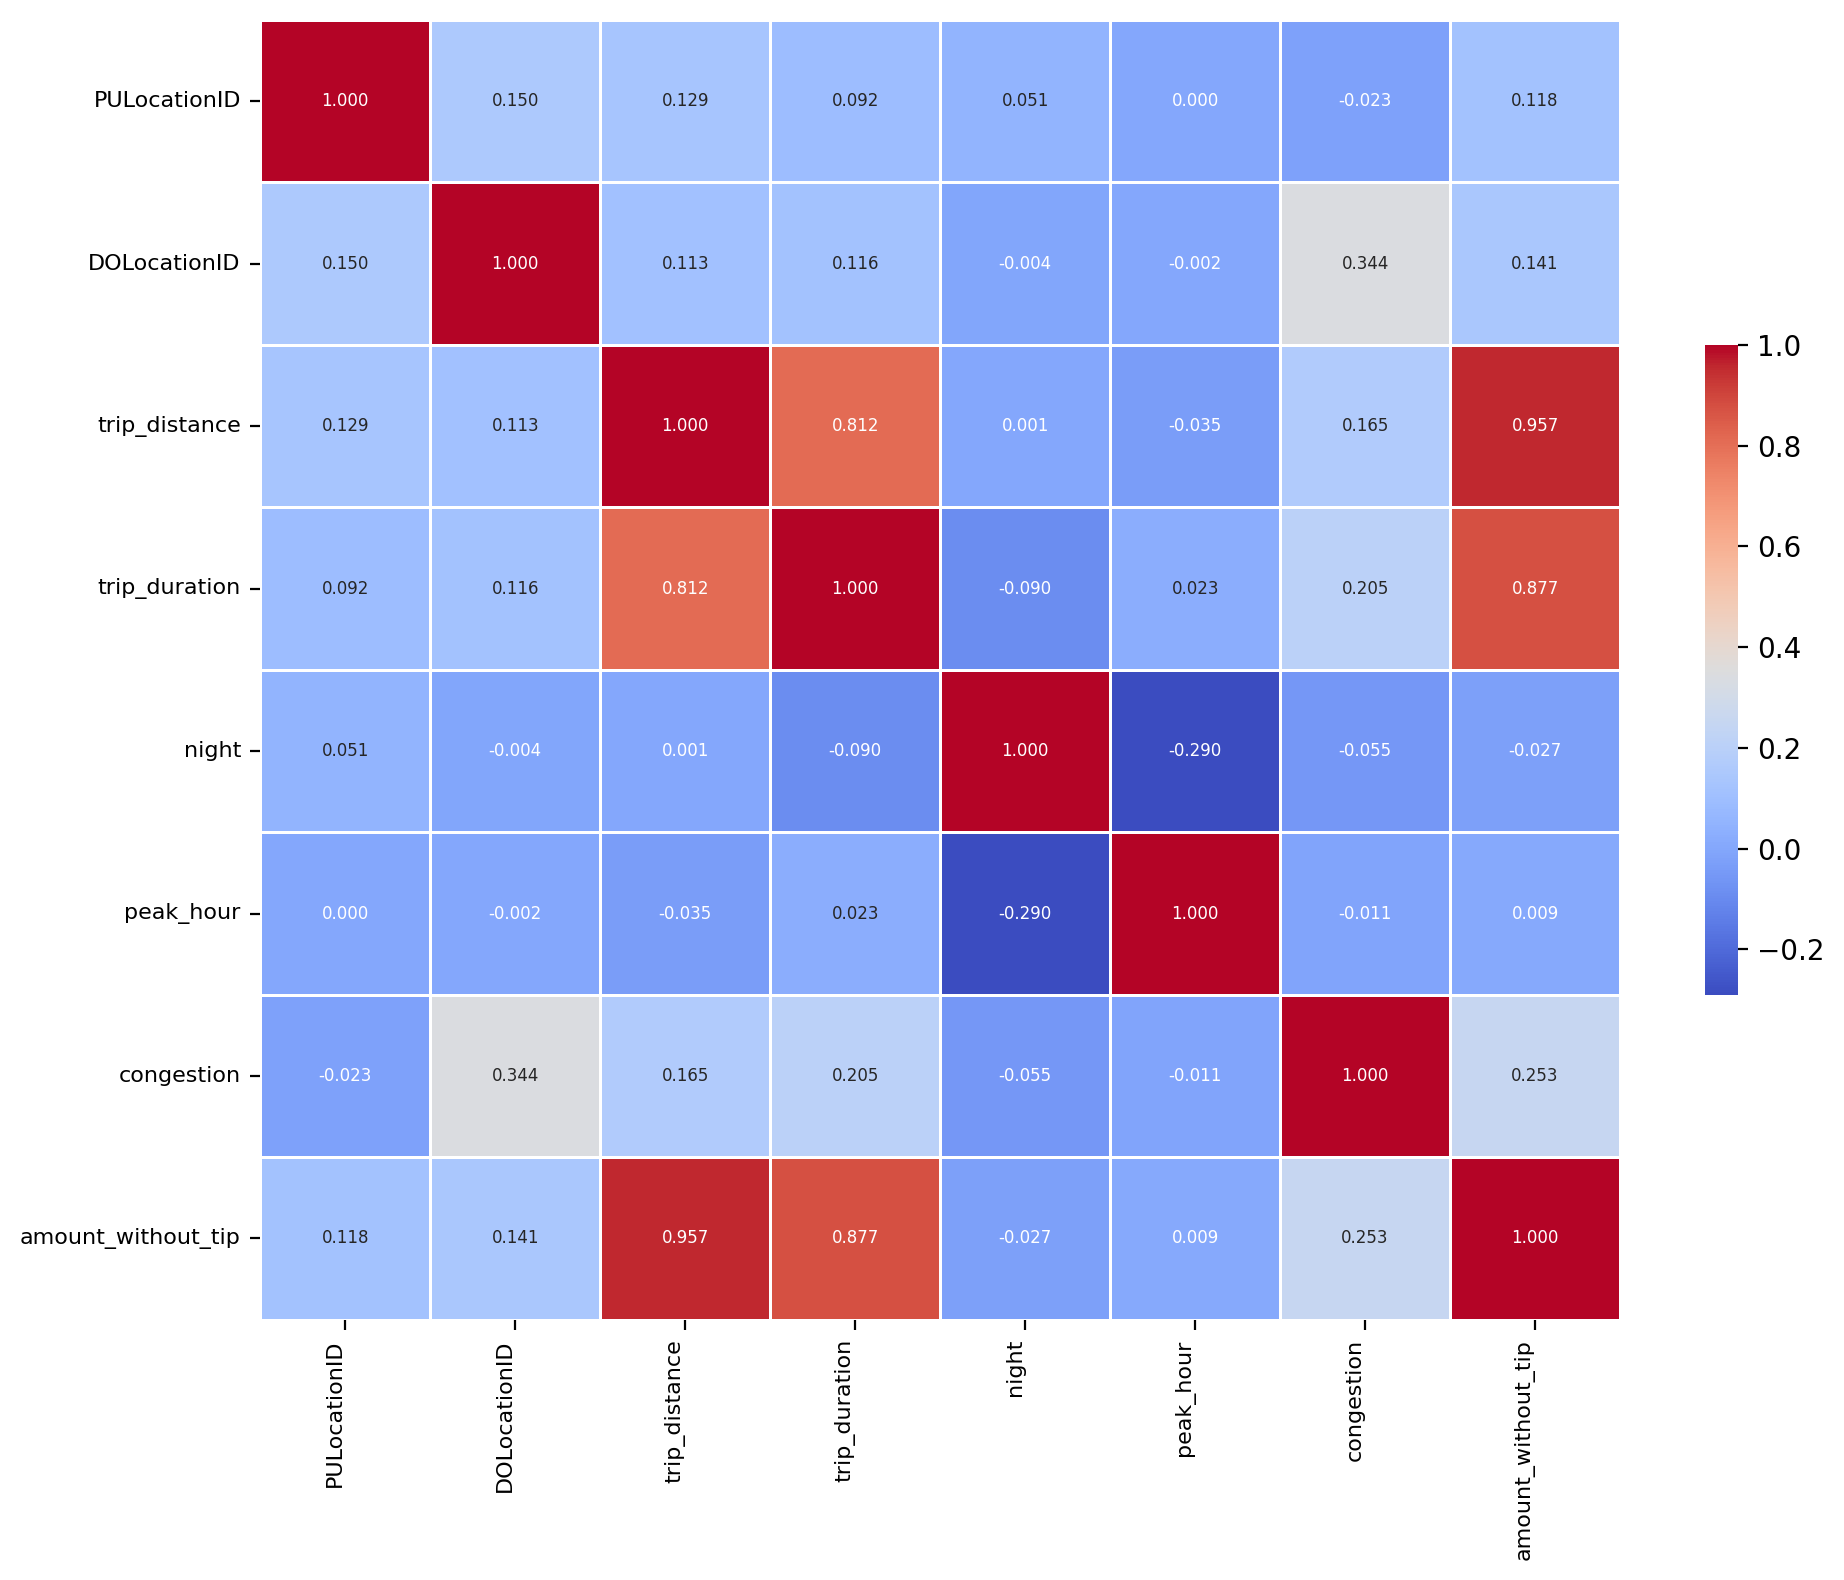

In [6]:
corr = data[[
            'PULocationID',
            'DOLocationID',
            'trip_distance',
            'trip_duration',
            'night',
            'peak_hour',
            'congestion',
             'amount_without_tip'
]].corr()
plt.figure(figsize=(10, 8), dpi=200)
sns.heatmap(corr, annot=True, fmt=".3f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 6})
plt.xticks(ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=22)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=22)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train

array([[-0.88907751, -0.72000288, -0.51181223, ..., -0.54964112,
        -0.5276932 , -0.47829835],
       [ 2.39032756,  1.38272242,  1.97342404, ..., -0.54964112,
        -0.5276932 , -0.47829835],
       [ 0.4286743 , -0.61551963, -0.63579227, ...,  1.81936896,
        -0.5276932 , -0.47829835],
       ...,
       [-0.05050818,  1.14763512, -0.21313304, ..., -0.54964112,
        -0.5276932 , -0.47829835],
       [-0.05050818, -0.82448612, -0.3991031 , ..., -0.54964112,
        -0.5276932 , -0.47829835],
       [ 0.84795897,  0.10280268,  0.57583086, ..., -0.54964112,
        -0.5276932 ,  2.09074523]])

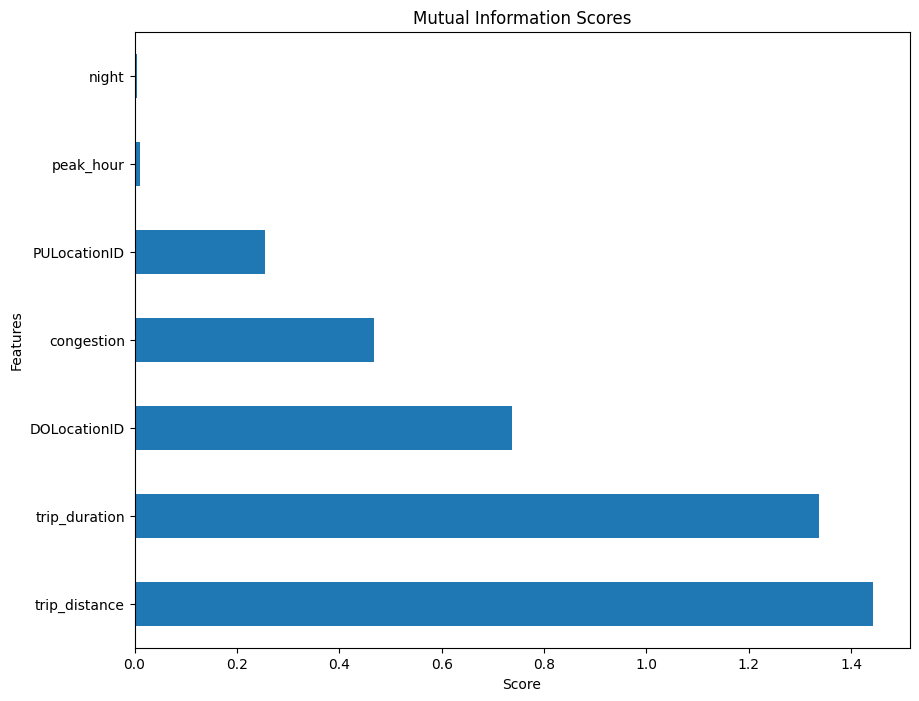

In [9]:
from sklearn.feature_selection import mutual_info_regression

feature_names = [
            'PULocationID',
            'DOLocationID',
            'trip_distance',
            'trip_duration',
            'night',
            'peak_hour',
            'congestion',
]

# Calculate the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info_scores = pd.Series(mutual_info, index=feature_names)

# Sort the scores
sorted_mi_scores = mutual_info_scores.sort_values(ascending=False)

# Plot the scores
plt.figure(figsize=(10, 8))
sorted_mi_scores.plot(kind='barh')
plt.title('Mutual Information Scores')
plt.xlabel('Score')
plt.ylabel('Features')

plt.show()


## Create Model

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [11]:
X_train.shape

(789848, 7)

In [12]:
# model = Sequential([
#     Input(shape=(X_train.shape[1],)),
#     Dense(128, activation='relu'),
#     Dropout(0.2),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(32, activation='relu'),
#     Dense(1)
# ])

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.003, clipvalue=1.0)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.Huber(),
              metrics=['mae'])


## Train Model

In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=200 , batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/200
6171/6171 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.6754 - mae: 0.9501 - val_loss: 0.4663 - val_mae: 0.7392
Epoch 2/200
6171/6171 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.4508 - mae: 0.7007 - val_loss: 0.4362 - val_mae: 0.6713
Epoch 3/200
6171/6171 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.4382 - mae: 0.6828 - val_loss: 0.4396 - val_mae: 0.6783
Epoch 4/200
6171/6171 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.4360 - mae: 0.6781 - val_loss: 0.4251 - val_mae: 0.6626
Epoch 5/200
6171/6171 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.4259 - mae: 0.6647 - val_loss: 0.4195 - val_mae: 0.6503
Epoch 6/200
6171/6171 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.4221 - mae: 0.6598 - val_loss: 0.4207 - val_mae: 0.6534
Epoch 7/200
6171/6171 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.4215 - mae: 0.6579 - val_loss: 0.4361 - val_mae: 0.6840
Epoch 8/200
6171/6171 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.4178 - mae: 0.6533 - val_loss: 0.4182 - val_mae: 0.6499
Epoch 9/200
6171/6171 ━━

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,141 (231.02 KB)

 Trainable params: 19,713 (77.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,428 (154.02 KB)

In [15]:
from sklearn.metrics import mean_squared_error

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Mean Absolute Error on test set: {test_mae}")
print(f"Huber Loss on test set: {test_loss}")
predictions = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error on test set: {mse}")
rmse = mse ** 0.5
print(f"Root Mean Squared Error on test set: {rmse}")

3491/3491 ━━━━━━━━━━━━━━━━━━━━ 3s 880us/step - loss: 0.3980 - mae: 0.6218
Mean Absolute Error on test set: 0.6234092712402344
Huber Loss on test set: 0.39900460839271545
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 3s 878us/step
Mean Squared Error on test set: 6.365044945200718
Root Mean Squared Error on test set: 2.522904069757849


In [16]:
predictions = model.predict(X_test)
print(predictions)
mean_prediction = predictions.mean()
print(f"Mean of Predictions: {mean_prediction}")

3491/3491 ━━━━━━━━━━━━━━━━━━━━ 3s 828us/step
[[ 5.272125 ]
 [16.778757 ]
 [ 8.976624 ]
 ...
 [ 5.0778027]
 [ 8.152244 ]
 [13.698871 ]]
Mean of Predictions: 14.142454147338867


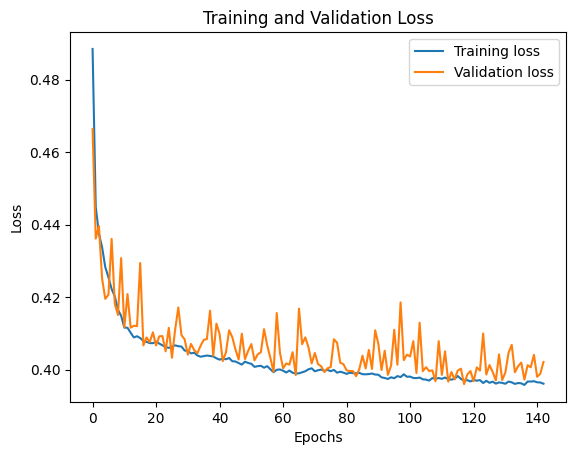

In [17]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()